## Test migration history reconstruction on Sanborn et. al. Melanoma data

In [1]:
import sys
import os

repo_dir = os.path.join(os.getcwd(), "../")
os.chdir(repo_dir)

from src.lib.metient import *

import matplotlib
import torch

matplotlib.rcParams['figure.figsize'] = [3, 3]
SANBORN_DATA_DIR = os.path.join(repo_dir, 'data/sanborn_melanoma_2015')
COLORS = ["#6aa84fff","#c27ba0ff", "#e69138ff", "#be5742e1", "#2496c8ff", "#674ea7ff"]


NOTE: Redirects are currently not supported in Windows or MacOs.


CUDA GPU: False


In [8]:
def find_labeling(all_mut_trees_fn, ref_var_fn, patient_name):    
    ref_matrix, var_matrix, unique_sites, cluster_label_to_idx = get_ref_var_matrices(ref_var_fn)
    data = get_adj_matrices_from_spruce_mutation_trees(all_mut_trees_fn, cluster_label_to_idx)
    print("num trees:", len(data))
    print(unique_sites)
    for adj_matrix, idx_to_label in data:
        G = get_genetic_distance_matrix_from_adj_matrix(adj_matrix, idx_to_label, "_")
        print(G)
        for idx in idx_to_label:
            idx_to_label[idx] = idx_to_label[idx].split("_")[0].split(":")[0]
        print(idx_to_label)

        weights = Weights(data_fit=1.0, mig=10.0, comig=5.0, seed_site=1.0, reg=2.0, gen_dist=2.0)
        print_config = PrintConfig(visualize=True, verbose=True, viz_intermeds=False, k_best_trees=6)
        get_migration_history(adj_matrix, ref_matrix, var_matrix, unique_sites, 'primary', idx_to_label,
                              weights, print_config, SANBORN_DATA_DIR, patient_name, max_iter=100, batch_size=256,
                              custom_colors=COLORS, weight_init_primary=True)


        

num trees: 1
['primary', 'parotid_gland', 'locoregional_1', 'locoregional_2']
tensor([[0.0000, 0.0254, 0.0085, 0.0000],
        [0.0000, 0.0000, 0.0000, 1.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000]])
{0: 'ENAM', 1: 'C11orf93', 2: 'KLHL6', 3: 'LPHN3'}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:26<00:00,  3.80it/s]


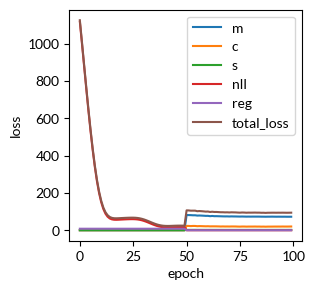

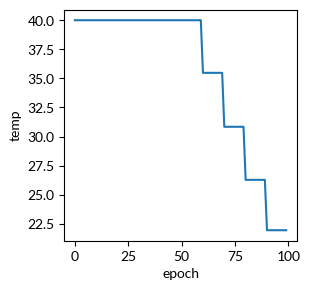

Time elapsed: 26.501492
Saving A to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/jupyter_notebooks/../data/sanborn_melanoma_2015


<Figure size 300x300 with 0 Axes>

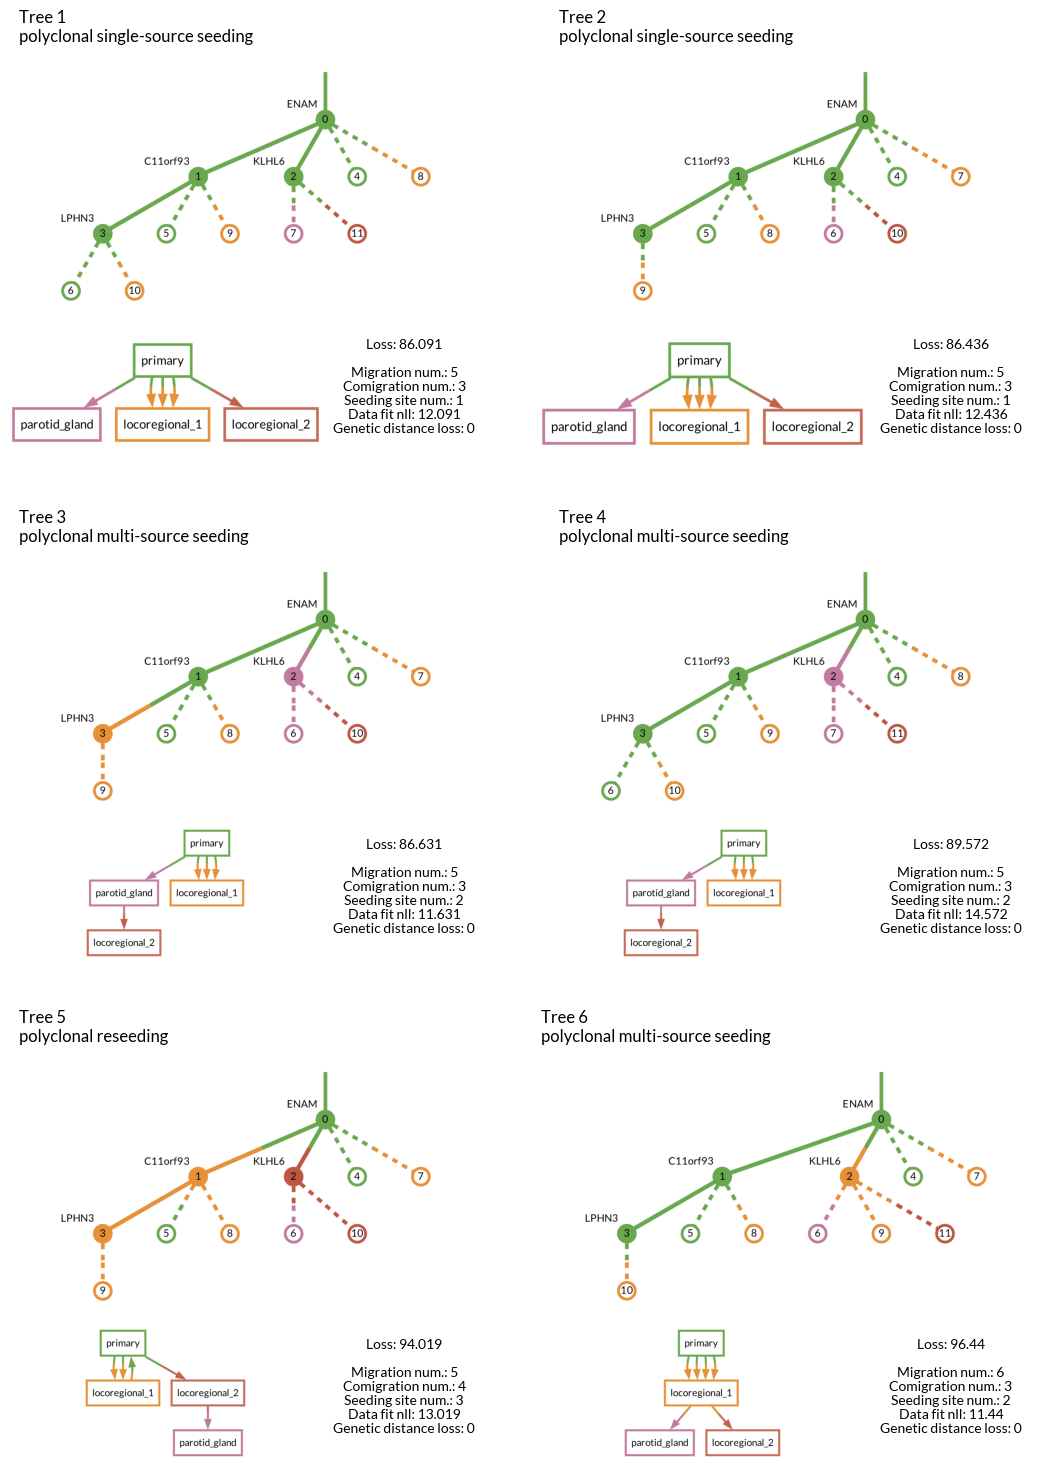

In [9]:
# Patient A
patient = "A"
find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), patient)


num trees: 1
['primary', 'locoregional_1', 'locoregional_2']
{0: 'CADM3', 1: 'GPR128', 2: 'MTHFR', 3: 'RERE', 4: 'AGRN'}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:26<00:00,  3.78it/s]


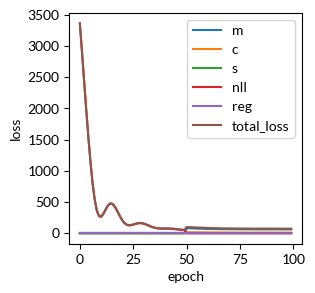

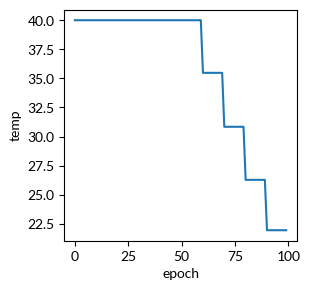

Time elapsed: 26.617172
Saving C to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/jupyter_notebooks/../data/sanborn_melanoma_2015


<Figure size 300x300 with 0 Axes>

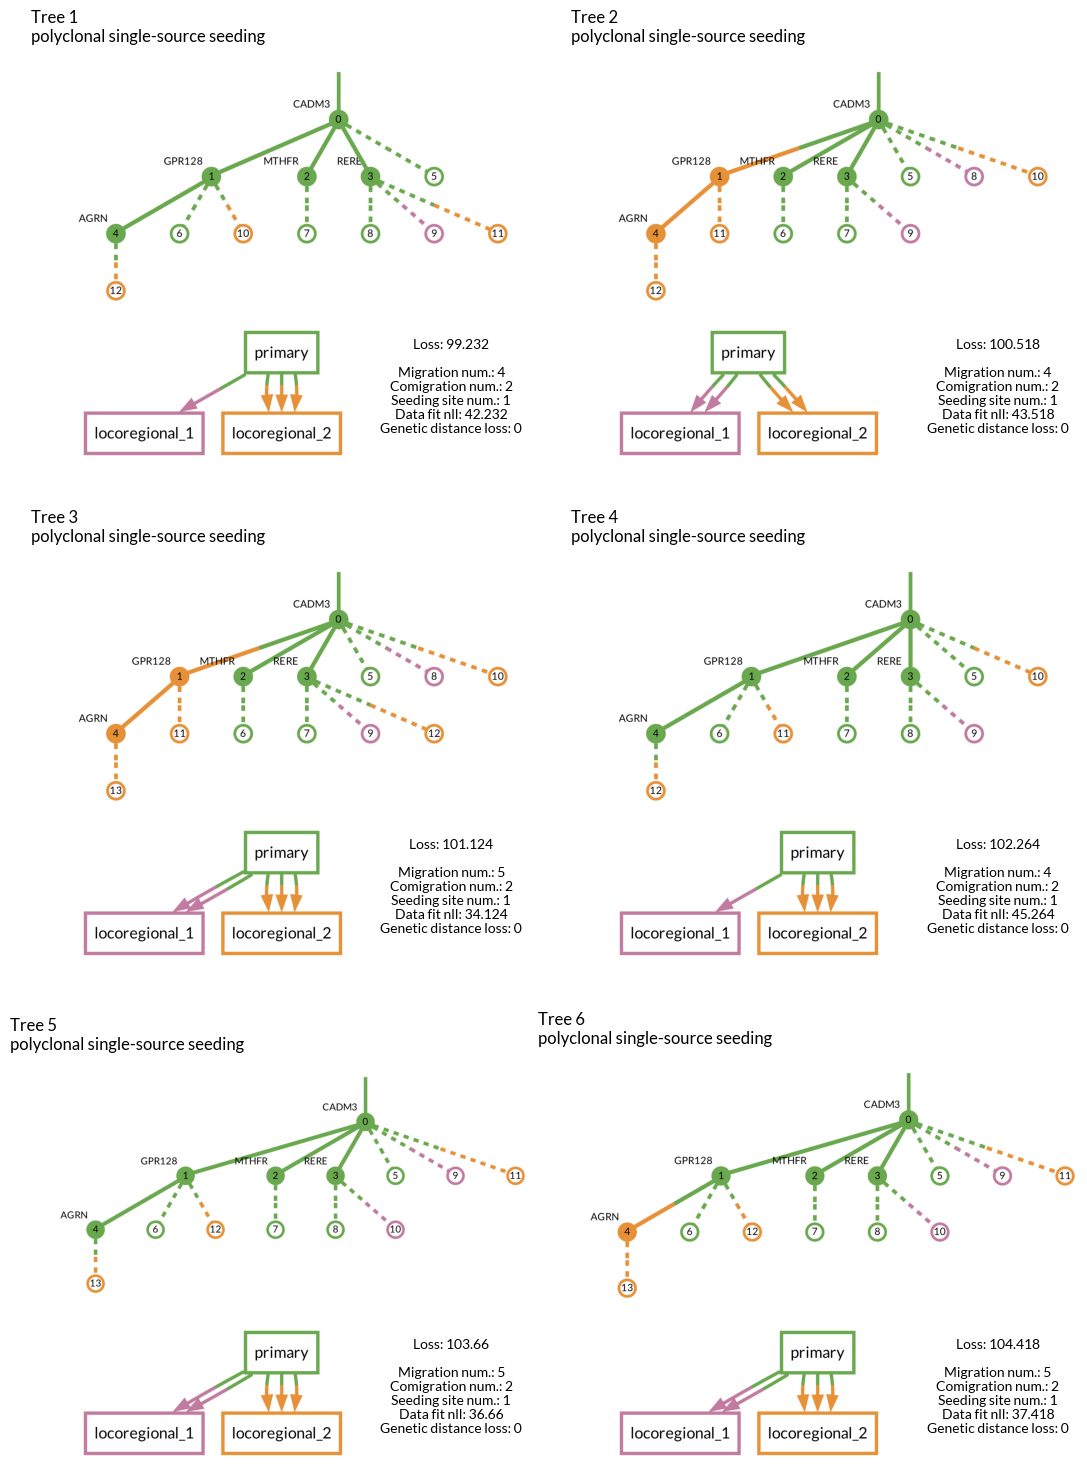

In [4]:
# Patient C
patient = "C"
find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), patient)

num trees: 1
['primary', 'lymph_node', 'locoregional_1', 'locoregional_2']
{0: 'ZNF407', 1: 'ASXL3'}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:26<00:00,  3.72it/s]


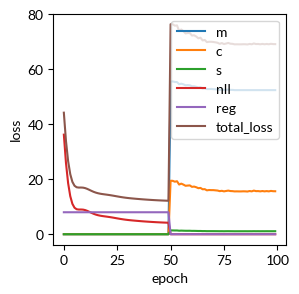

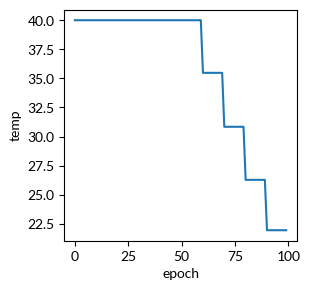

Time elapsed: 27.06464
Saving D to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/jupyter_notebooks/../data/sanborn_melanoma_2015


<Figure size 300x300 with 0 Axes>

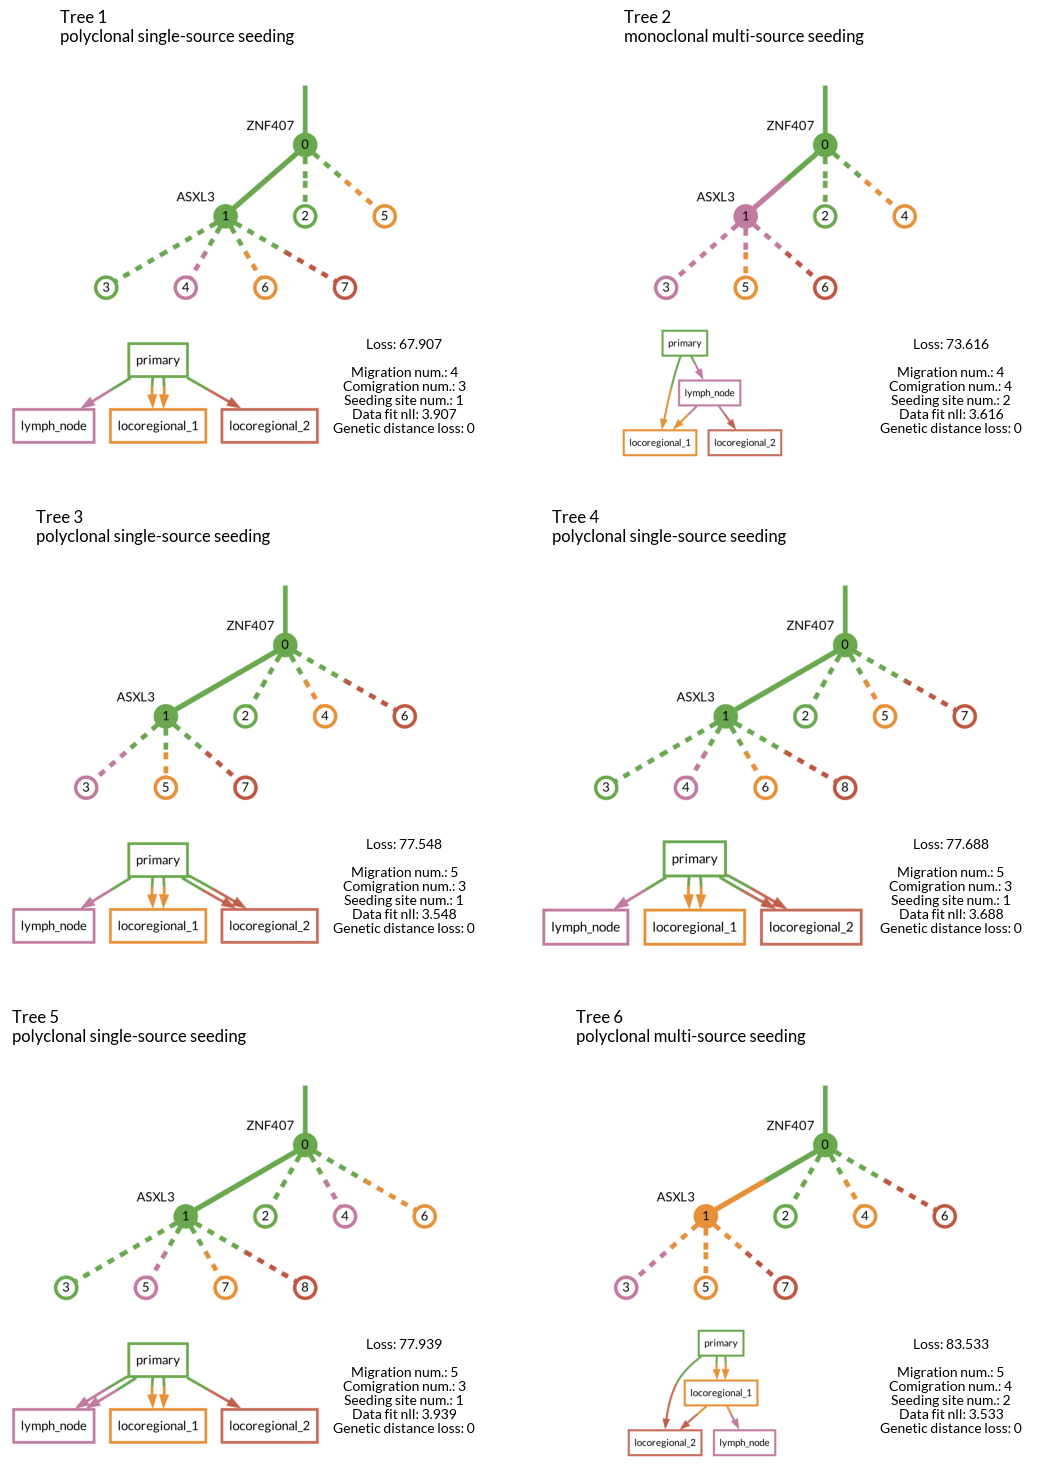

In [5]:
# Patient D
patient = "D"
find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), patient)

num trees: 1
['primary', 'locoregional_1', 'locoregional_2', 'lymph_node', 'locoregional_3']
{0: 'ASPM', 1: 'ZNF829', 2: 'MLL4', 3: 'ORC1', 4: 'ERBB4', 5: 'RNF148', 6: 'EXOSC10', 7: 'LACTB'}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:28<00:00,  3.57it/s]


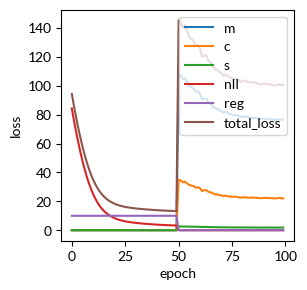

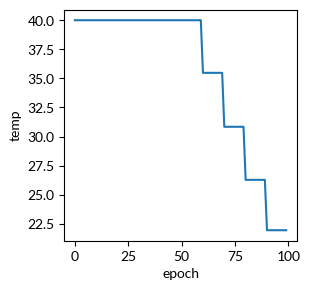

Time elapsed: 28.216384
Saving E to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/jupyter_notebooks/../data/sanborn_melanoma_2015


<Figure size 300x300 with 0 Axes>

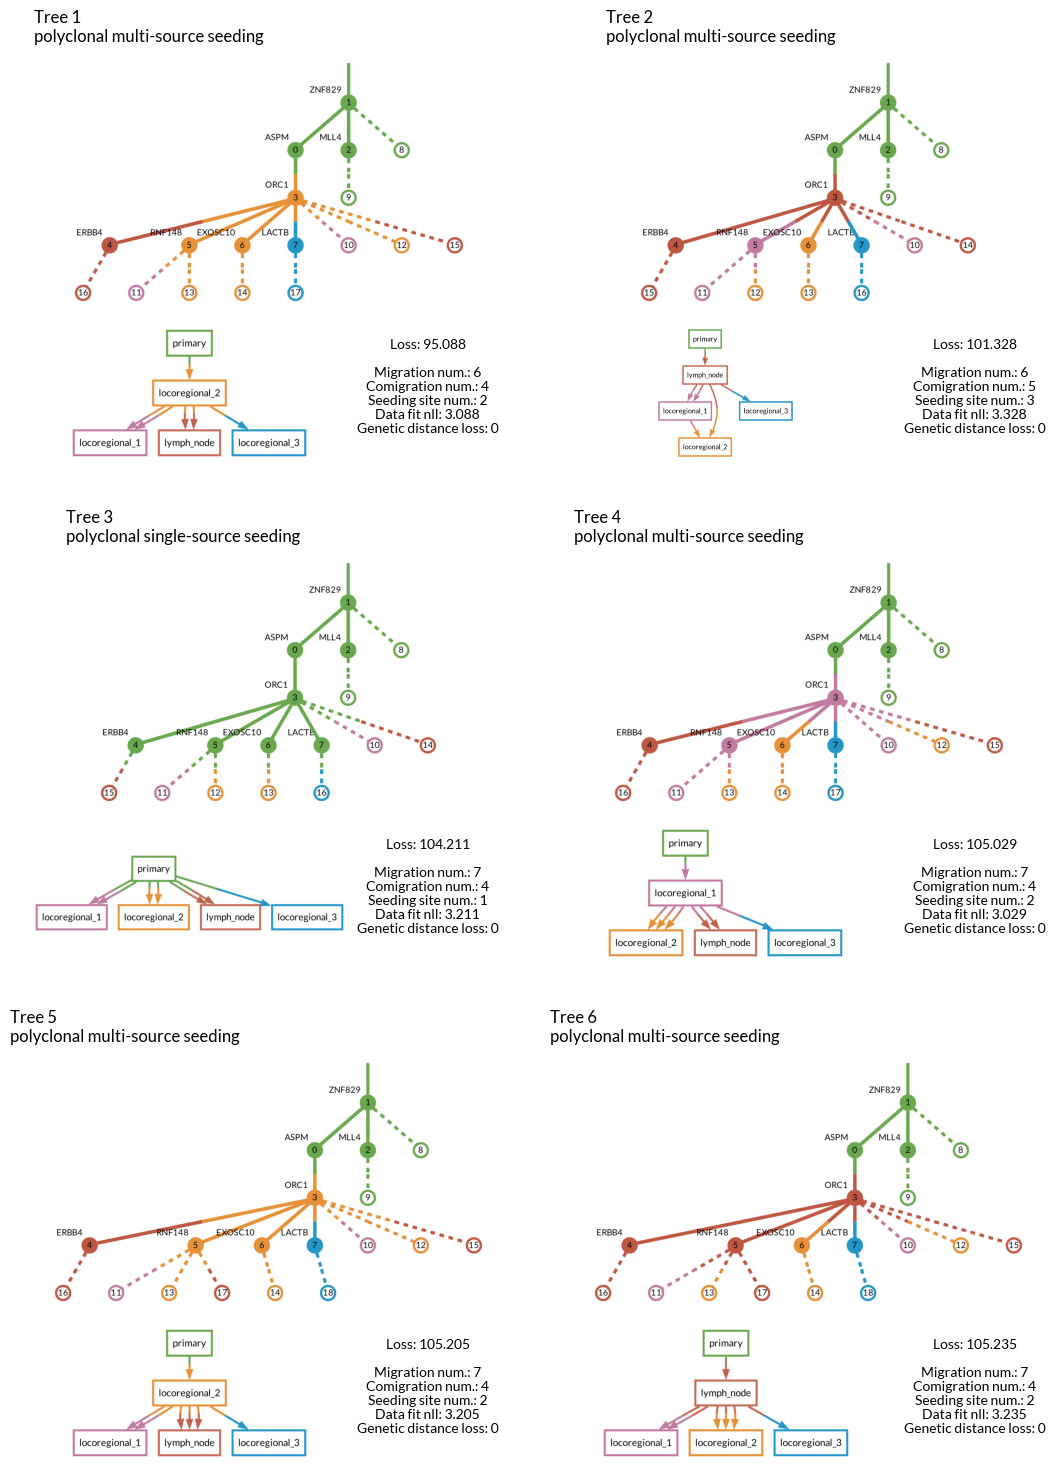

In [6]:
# Patient E
patient = "E"
find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), patient)

num trees: 1
['primary', 'lymph_node', 'locoregional', 'distant']
{0: 'CNGA3', 1: 'LY75-CD302', 2: 'DOCK10', 3: 'TXNDC16', 4: 'LCK'}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:29<00:00,  3.39it/s]


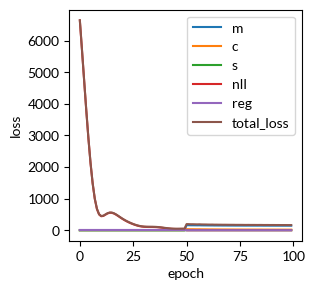

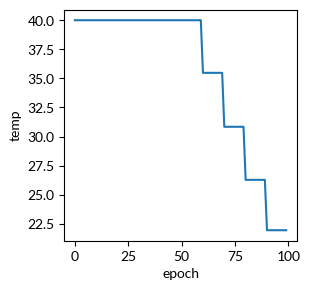

Time elapsed: 29.725022
Saving F to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/jupyter_notebooks/../data/sanborn_melanoma_2015


<Figure size 300x300 with 0 Axes>

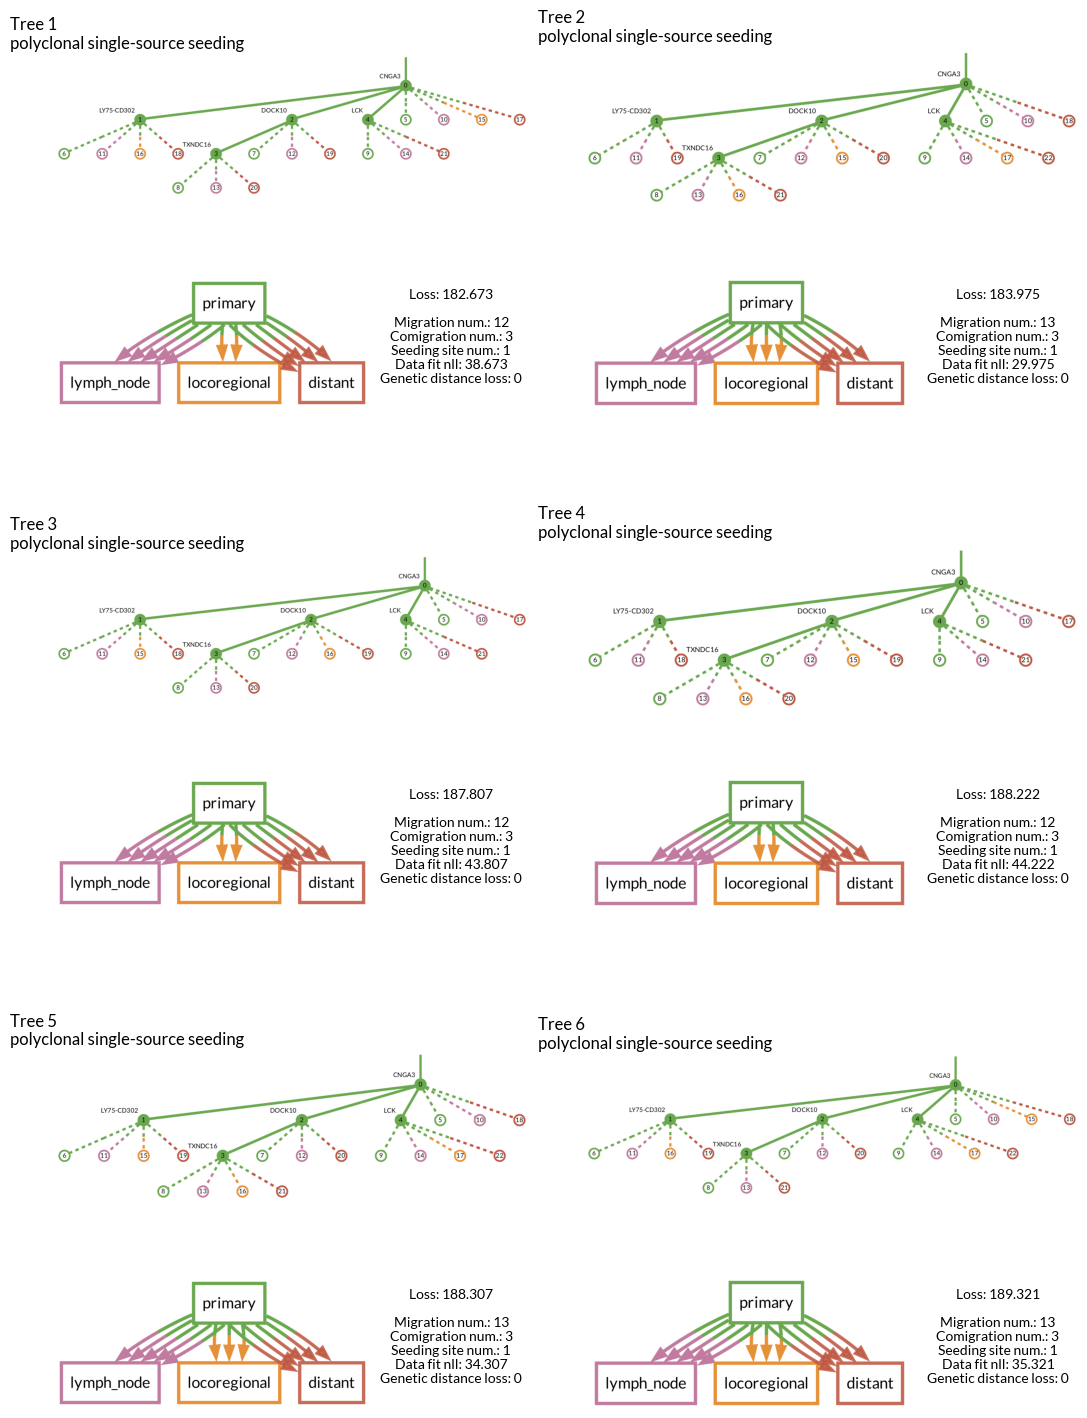

In [7]:
# Patient F
patient = "F"
find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), patient)